In [1]:
import os
import pandas as pd
from mlxtend.evaluate import cochrans_q
from pycm import *
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/promm/Documents/S2-classification/rfmodels'

In [9]:
files = os.listdir(path)

# get files starting with  prd_ndvi
files = [file for file in files if file.startswith('pred_all')]

dfs = []

pred = []

cms = {}
names = []
kappa = []
acc = []


for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)
    pred.append(df['y_pred'].to_numpy())
    name = file.split('_')[2].split('.')[0]
    cms[name] = ConfusionMatrix(actual_vector=df['y_obs'].to_numpy(), predict_vector=df['y_pred'].to_numpy())
    names.append(name)
    kappa.append(cms[name].Kappa)
    acc.append(cms[name].Overall_ACC)
    print(f"{name} kappa: {cms[name].Kappa}")

df = pd.DataFrame({'model': names, 'kappa': kappa, 'acc': acc})

# sort by kappa
df = df.sort_values(by='kappa', ascending=True)


0 kappa: 0.8577777777777779
1 kappa: 0.8444444444444444
10 kappa: 0.8244444444444444
11 kappa: 0.8422222222222222
12 kappa: 0.8711111111111111
13 kappa: 0.8622222222222222
14 kappa: 0.8355555555555555
15 kappa: 0.8311111111111111
16 kappa: 0.8666666666666667
17 kappa: 0.8577777777777779
18 kappa: 0.8311111111111111
19 kappa: 0.8311111111111111
2 kappa: 0.8244444444444444
20 kappa: 0.8688888888888889
21 kappa: 0.8577777777777779
22 kappa: 0.8311111111111111
23 kappa: 0.8311111111111111
24 kappa: 0.8688888888888889
25 kappa: 0.8555555555555556
26 kappa: 0.8377777777777777
27 kappa: 0.8355555555555555
28 kappa: 0.8755555555555555
29 kappa: 0.86
3 kappa: 0.8444444444444444
30 kappa: 0.8355555555555555
31 kappa: 0.8355555555555555
32 kappa: 0.8755555555555555
33 kappa: 0.8577777777777779
34 kappa: 0.8355555555555555
35 kappa: 0.8355555555555555
4 kappa: 0.8555555555555556
5 kappa: 0.8444444444444444
6 kappa: 0.8244444444444444
7 kappa: 0.8422222222222222
8 kappa: 0.8622222222222222
9 kappa:

In [10]:
df_all = df.copy()
# add numeric column
df_all['model_num'] = [i for i in range(len(df))]

In [6]:
df_band = df.copy()
# add numeric column
df_band['model_num'] = [i for i in range(len(df))]

In [8]:
df_ndvi = df.copy()
# add numeric column
df_ndvi['model_num'] = [i for i in range(len(df))]

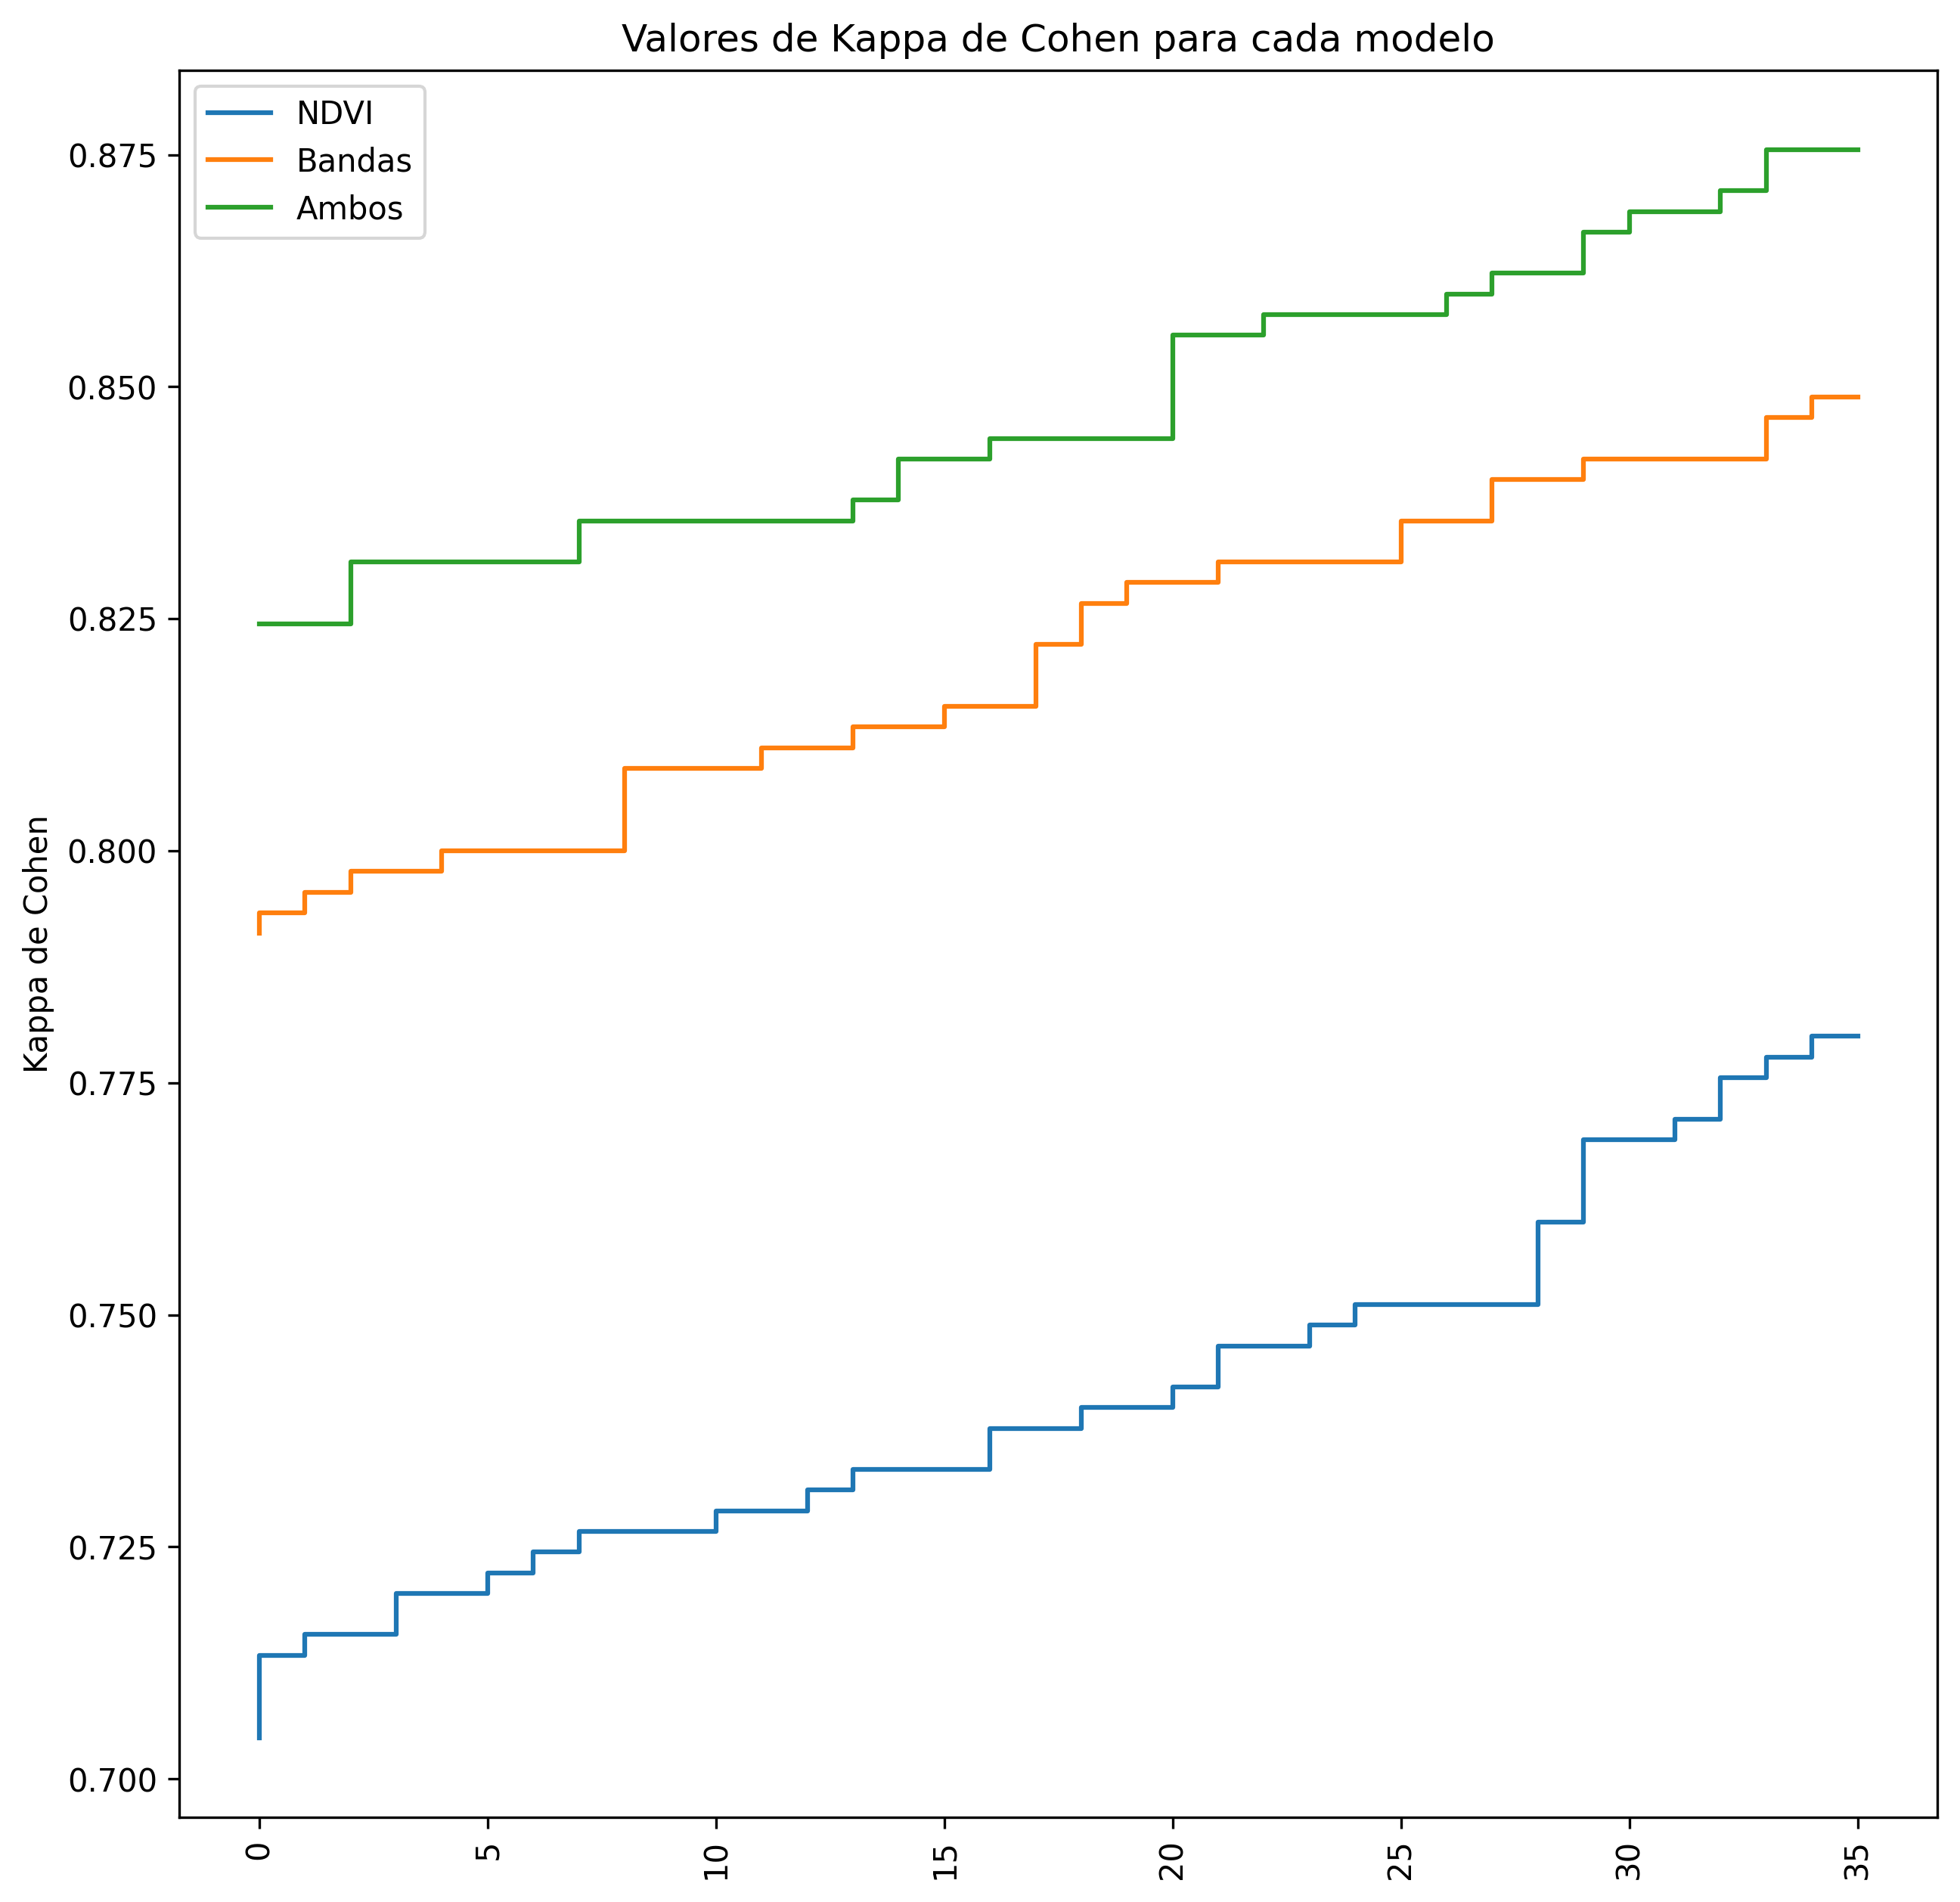

In [11]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = 10,10

# create a step plot with kappa
plt.step(df_ndvi['model_num'], df_ndvi['kappa'])
plt.step(df_band['model_num'], df_band['kappa'])
plt.step(df_all['model_num'], df_all['kappa'])
plt.legend(['NDVI', 'Bandas', 'Ambos'])
plt.xticks(rotation=90)
plt.ylabel('Kappa de Cohen')
plt.title('Valores de Kappa de Cohen para cada modelo')
plt.show()

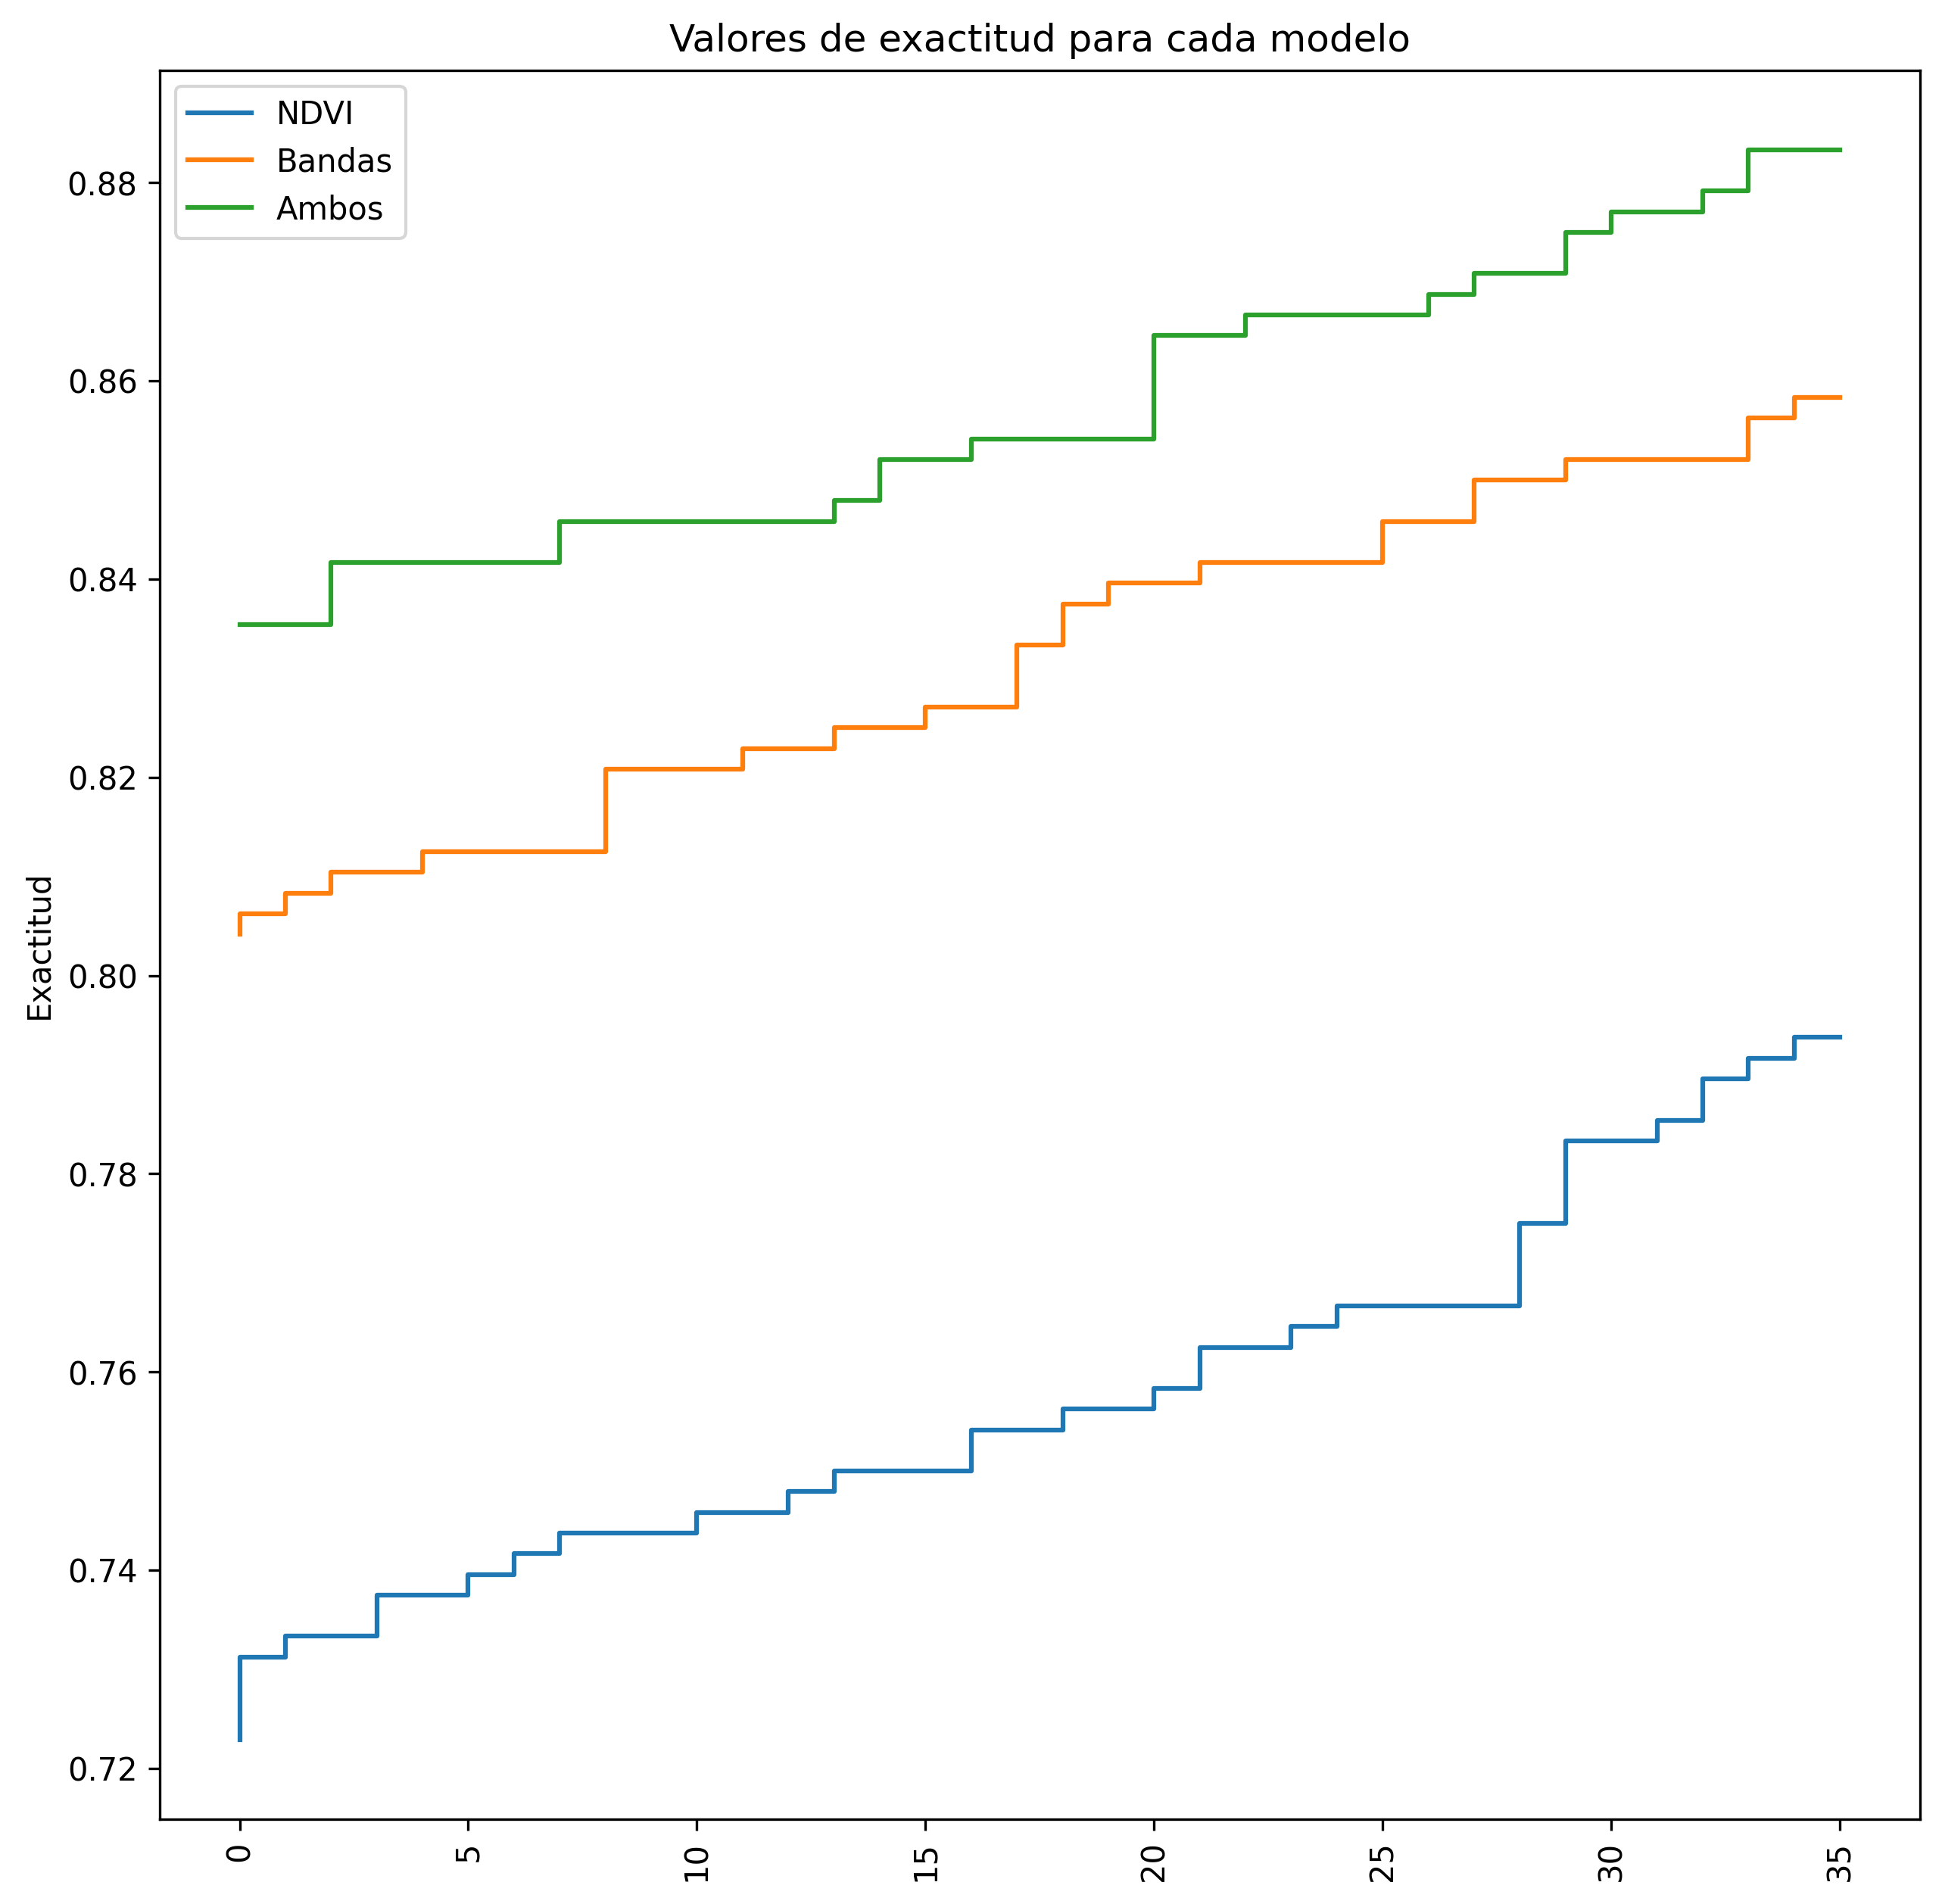

In [12]:
# create a step plot with kappa
plt.step(df_ndvi['model_num'], df_ndvi['acc'])
plt.step(df_band['model_num'], df_band['acc'])
plt.step(df_all['model_num'], df_all['acc'])
plt.legend(['NDVI', 'Bandas', 'Ambos'])
plt.xticks(rotation=90)
plt.ylabel('Exactitud')
plt.title('Valores de exactitud para cada modelo')
plt.show()

In [15]:
df_all

,model,kappa,acc,model_num
12,2,0.824444,0.835417,0
2,10,0.824444,0.835417,1
32,6,0.824444,0.835417,2
11,19,0.831111,0.841667,3
10,18,0.831111,0.841667,4
15,22,0.831111,0.841667,5
7,15,0.831111,0.841667,6
16,23,0.831111,0.841667,7
24,30,0.835556,0.845833,8
25,31,0.835556,0.845833,9


In [16]:
best_ndvi = pd.read_csv(os.path.join(path,'pred_ndvi_20.csv'))

In [17]:
best_band = pd.read_csv(os.path.join(path,'pred_band_35.csv'))

In [18]:
best_all = pd.read_csv(os.path.join(path,'pred_all_32.csv'))

In [19]:
q, p_value = cochrans_q(best_ndvi['y_obs'].to_numpy(), best_ndvi['y_pred'].to_numpy(), best_band['y_pred'].to_numpy(), best_all['y_pred'].to_numpy())	

In [20]:
p_value

3.119002149181402e-07

In [21]:
cm = ConfusionMatrix(actual_vector=best_all['y_obs'].to_numpy(), predict_vector=best_all['y_pred'].to_numpy())

cm.relabel(mapping={0: 'almond', 1: 'avocado', 2: 'barren', 3: 'barren shadowed', 4: 'forage',
                    5: 'industrial grape', 6: 'lemon', 7: 'mandarin', 8: 'olive', 9: 'orange',
       10: 'riverside vegetation', 11: 'short cycle crop', 12: 'table grape', 13: 'urban',
       14: 'walnut', 15: 'water'})

In [22]:
print(cm)

Predict                    almond                     avocado                    barren                     barren shadowed            forage                     industrial grape           lemon                      mandarin                   olive                      orange                     riverside vegetation       short cycle crop           table grape                urban                      walnut                     water                      
Actual
almond                     30                         0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          0                          

avocado                    1                          27                

c:\Users\promm\anaconda3\envs\tf_env\lib\site-packages\pycm\pycm_obj.py:217: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


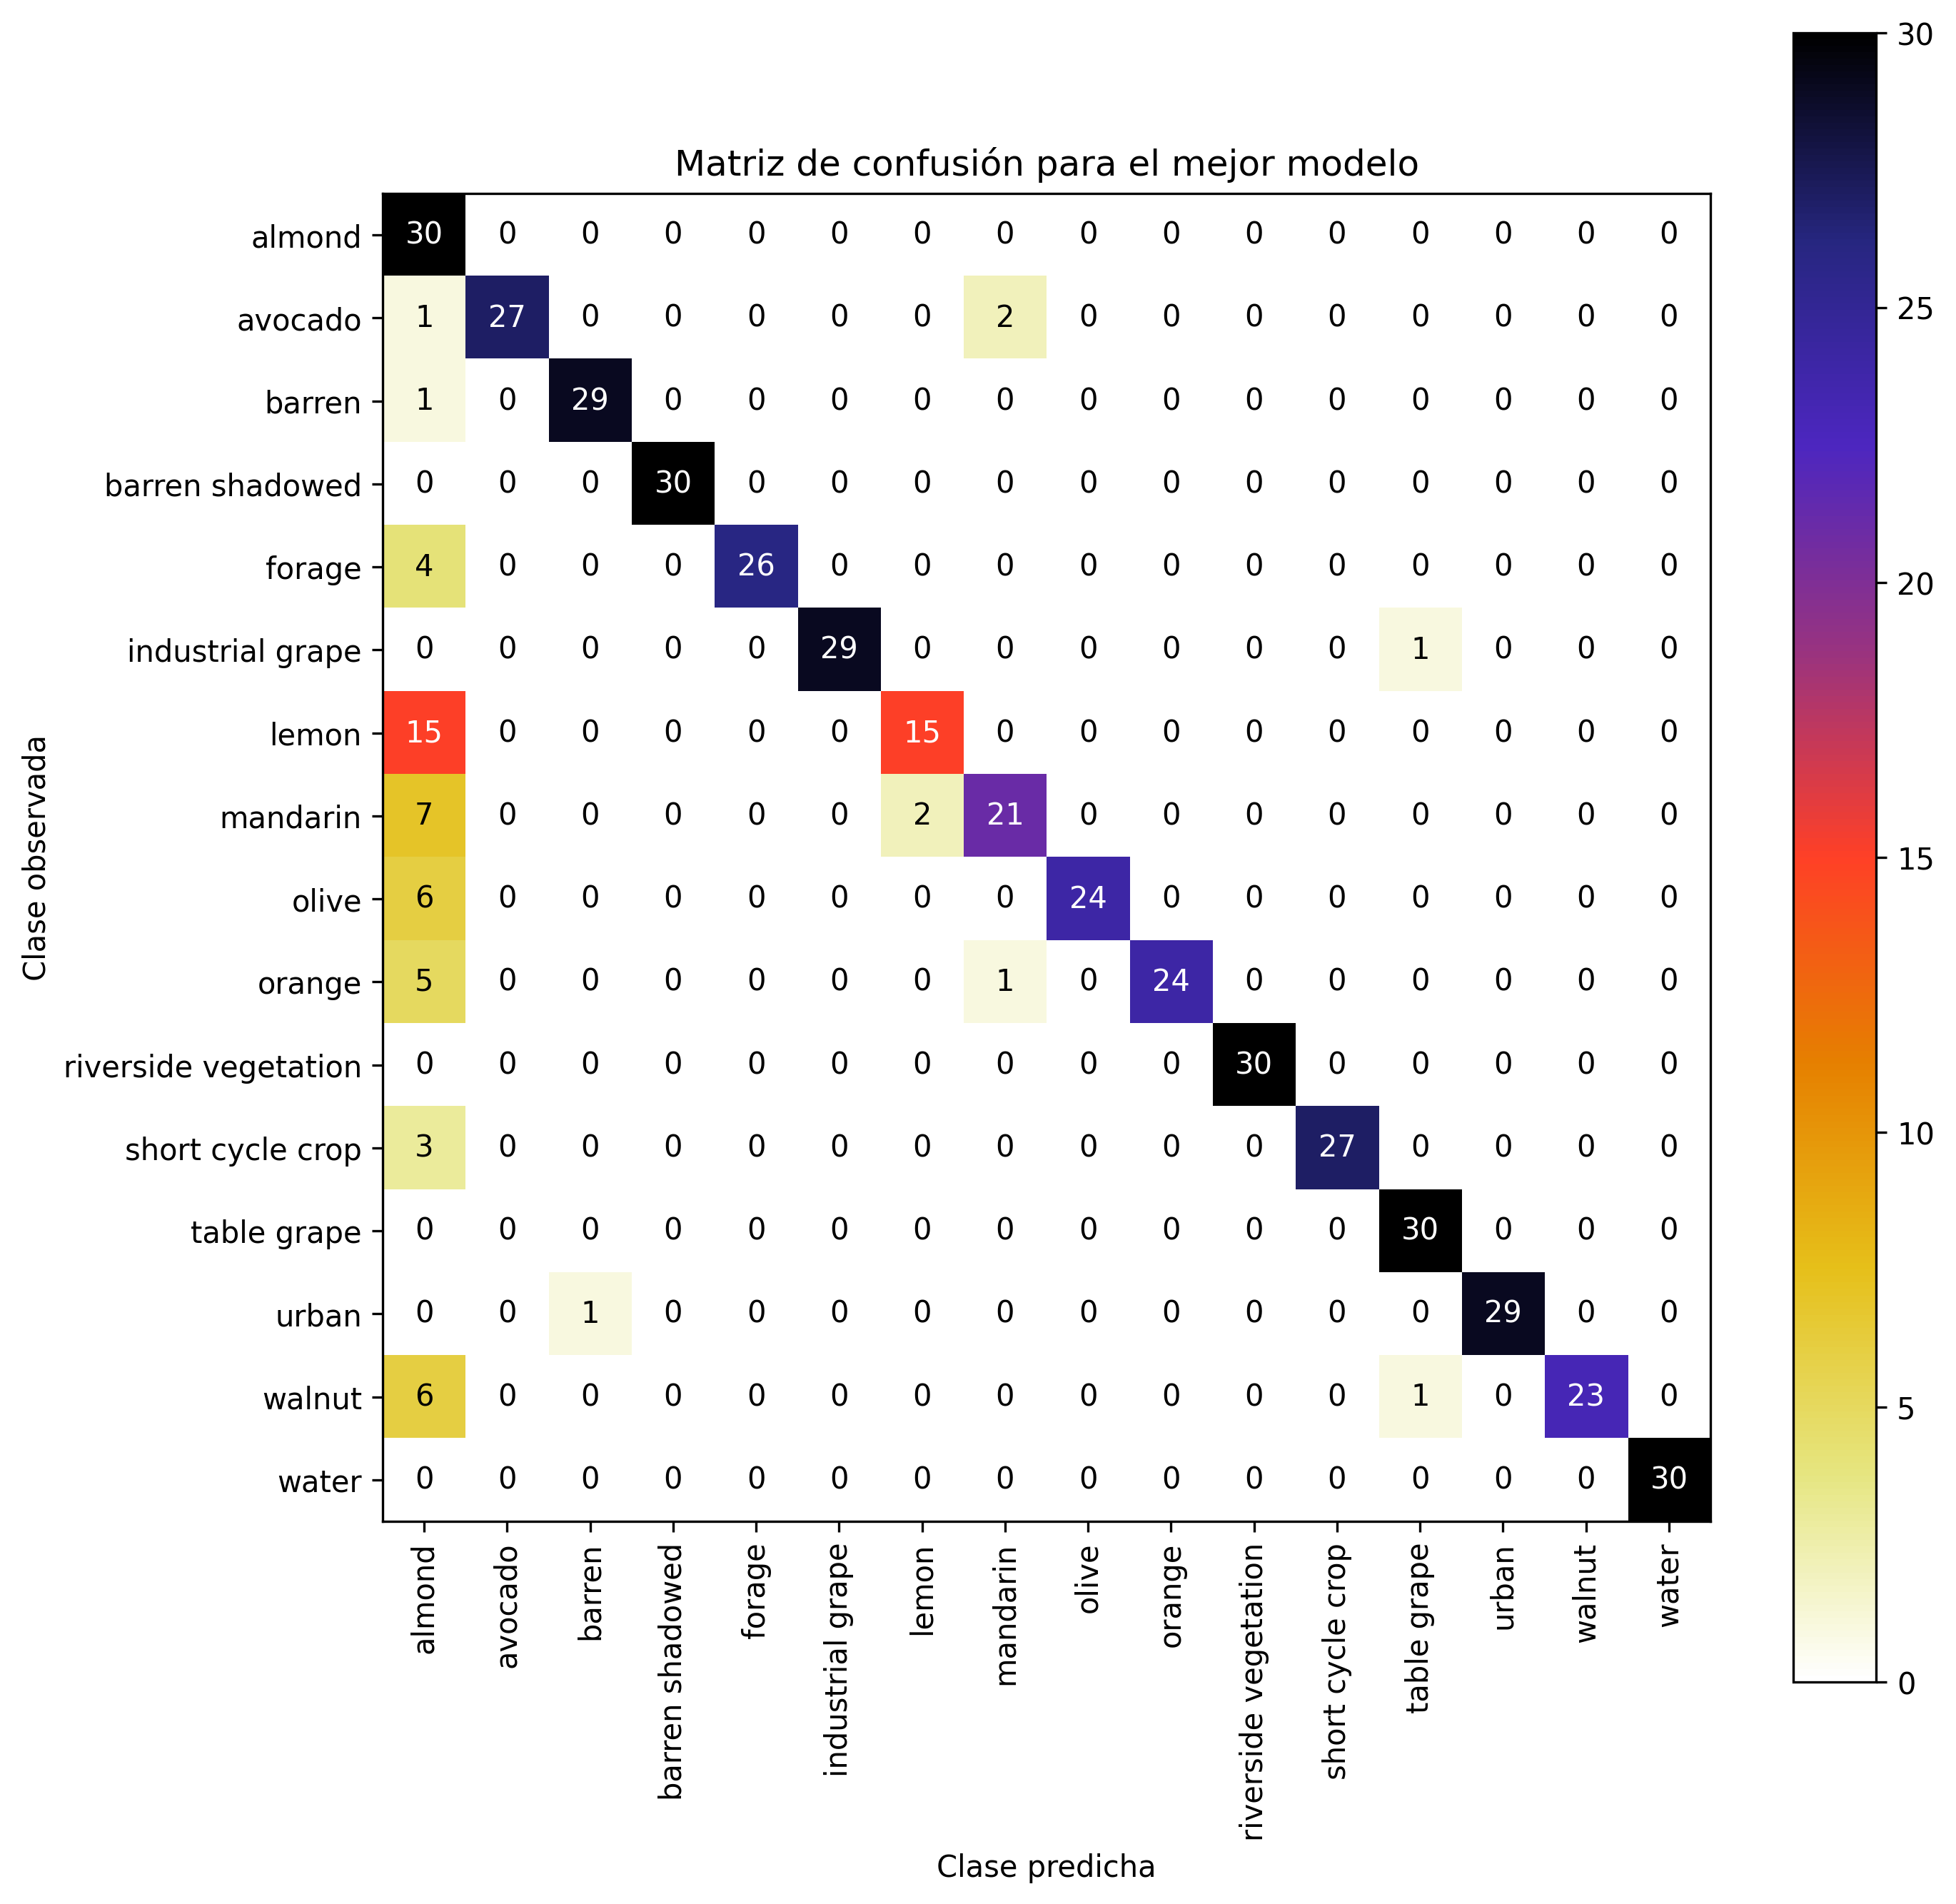

In [23]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = 10,10


cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión para el mejor modelo')
plt.ylabel('Clase observada')
plt.xlabel('Clase predicha')
plt.show()

In [50]:
print(pd.DataFrame(cm.class_stat))

                           TPR       TNR       PPV       NPV       FNR  \
almond                1.000000  1.000000  1.000000  1.000000  0.000000   
avocado               0.900000  1.000000  1.000000  0.993377  0.100000   
barren                0.966667  0.995556  0.935484  0.997773  0.033333   
barren shadowed       1.000000  0.997778  0.967742  1.000000  0.000000   
forage                1.000000  1.000000  1.000000  1.000000  0.000000   
industrial grape      1.000000  0.995556  0.937500  1.000000  0.000000   
lemon                 1.000000  0.995556  0.937500  1.000000  0.000000   
mandarin              0.833333  0.986667  0.806452  0.988864  0.166667   
olive                 0.900000  1.000000  1.000000  0.993377  0.100000   
orange                0.933333  0.995556  0.933333  0.995556  0.066667   
riverside vegetation  1.000000  0.993333  0.909091  1.000000  0.000000   
short cycle crop      1.000000  1.000000  1.000000  1.000000  0.000000   
table grape           1.000000  1.0000

In [ ]:
com = Compare(cms,by_class=True)

In [ ]:
print(com.sorted)

In [64]:
print(com.print_report())

Best : model11

Rank                          Name       Class-Score       Overall-Score
1                             model11    0.59896           0.95238
2                             model7     0.5875            0.92381
3                             model6     0.58281           0.92381
3                             model2     0.58281           0.92381
5                             model13    0.57396           0.92381
6                             model23    0.57188           0.92381
6                             model18    0.57188           0.92381
8                             model14    0.57135           0.92381
8                             model10    0.57135           0.92381
10                            model9     0.56667           0.92381
11                            model17    0.56406           0.92381
12                            model8     0.56042           0.92381
13                            model16    0.5599            0.92381
13                            model15   

In [8]:
ndvi1 = pd.read_csv(os.path.join(path, 'pred_ndvi_1.csv'))

In [9]:
band1 = pd.read_csv(os.path.join(path, 'pred_band_1.csv'))

In [10]:
all1 = pd.read_csv(os.path.join(path, 'pred_all_1.csv'))

In [18]:
q, p_value = cochrans_q(ndvi1['y_obs'].to_numpy(), ndvi1['y_pred'].to_numpy(), band1['y_pred'].to_numpy(), all1['y_pred'].to_numpy())	

In [19]:
q

15.625

In [22]:
cm = ConfusionMatrix(actual_vector=ndvi1['y_obs'].to_numpy(), predict_vector=ndvi1['y_pred'].to_numpy())

In [24]:
print(cm.overall_stat)

{'Overall ACC': 0.8291666666666667, 'Overall RACCU': 0.06258897569444444, 'Overall RACC': 0.0625, 'Kappa': 0.8177777777777778, 'Gwet AC1': 0.8177789307197285, 'Bennett S': 0.8177777777777778, 'Kappa Standard Error': 0.01832379100711498, 'Kappa Unbiased': 0.8177604818975875, 'Scott PI': 0.8177604818975875, 'Kappa No Prevalence': 0.6583333333333334, 'Kappa 95% CI': (0.7818631474038324, 0.8536924081517232), 'Standard Error': 0.017178554069170297, '95% CI': (0.7954967006910929, 0.8628366326422405), 'Chi-Squared': 5168.70733966071, 'Phi-Squared': 10.768140290959813, 'Cramer V': 0.8472756454645212, 'Response Entropy': 3.9958891322548107, 'Reference Entropy': 4.0, 'Cross Entropy': 4.004127509925045, 'Joint Entropy': 4.746710225023156, 'Conditional Entropy': 0.7467102250231538, 'Mutual Information': 3.249178907231657, 'KL Divergence': 0.0041275099250454505, 'Lambda B': 0.8157303370786517, 'Lambda A': 0.8177777777777778, 'Chi-Squared DF': 225, 'Overall J': (11.743205123850283, 0.733950320240642

In [25]:
cm2 = ConfusionMatrix(actual_vector=band1['y_obs'].to_numpy(), predict_vector=band1['y_pred'].to_numpy())

In [26]:
print(cm2.overall_stat)

{'Overall ACC': 0.88125, 'Overall RACCU': 0.06262803819444443, 'Overall RACC': 0.0625, 'Kappa': 0.8733333333333333, 'Gwet AC1': 0.8733344866150138, 'Bennett S': 0.8733333333333333, 'Kappa Standard Error': 0.015749779539903266, 'Kappa Unbiased': 0.8733160315876474, 'Scott PI': 0.8733160315876474, 'Kappa No Prevalence': 0.7625, 'Kappa 95% CI': (0.8424637654351229, 0.9042029012315437), 'Standard Error': 0.014765418318659313, '95% CI': (0.8523097800954277, 0.9101902199045723), 'Chi-Squared': 5715.649600915634, 'Phi-Squared': 11.907603335240905, 'Cramer V': 0.8909771166249971, 'Response Entropy': 3.99405269264951, 'Reference Entropy': 4.0, 'Cross Entropy': 4.0060140434106355, 'Joint Entropy': 4.536787119993395, 'Conditional Entropy': 0.5367871199933943, 'Mutual Information': 3.457265572656116, 'KL Divergence': 0.006014043410635319, 'Lambda B': 0.8716216216216216, 'Lambda A': 0.8733333333333333, 'Chi-Squared DF': 225, 'Overall J': (12.890586228287841, 0.8056616392679901), 'Hamming Loss': 0.1

In [27]:
cm3 = ConfusionMatrix(actual_vector=all1['y_obs'].to_numpy(), predict_vector=all1['y_pred'].to_numpy())

In [28]:
print(cm3.overall_stat)

{'Overall ACC': 0.88125, 'Overall RACCU': 0.06265842013888889, 'Overall RACC': 0.0625, 'Kappa': 0.8733333333333333, 'Gwet AC1': 0.8733347602719908, 'Bennett S': 0.8733333333333333, 'Kappa Standard Error': 0.015749779539903266, 'Kappa Unbiased': 0.8733119253948005, 'Scott PI': 0.8733119253948005, 'Kappa No Prevalence': 0.7625, 'Kappa 95% CI': (0.8424637654351229, 0.9042029012315437), 'Standard Error': 0.014765418318659313, '95% CI': (0.8523097800954277, 0.9101902199045723), 'Chi-Squared': 5794.985301738183, 'Phi-Squared': 12.07288604528788, 'Cramer V': 0.8971393814150946, 'Response Entropy': 3.9925205325291957, 'Reference Entropy': 4.0, 'Cross Entropy': 4.007694833608252, 'Joint Entropy': 4.491537500167392, 'Conditional Entropy': 0.49153750016739184, 'Mutual Information': 3.5009830323618036, 'KL Divergence': 0.007694833608251676, 'Lambda B': 0.8716216216216216, 'Lambda A': 0.8733333333333333, 'Chi-Squared DF': 225, 'Overall J': (12.971119030499962, 0.8106949394062476), 'Hamming Loss': 0

In [32]:
com = Compare({'ndvi':cm, 'band': cm2, 'all':cm3},by_class=True)

In [34]:
print(com.sorted)

['band', 'all', 'ndvi']
